In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, _), (x_test, _) = datasets.cifar10.load_data()

In [5]:
x_train = x_train.reshape((50000, 32, 32, 3))
x_test = x_test.reshape((10000, 32, 32, 3))

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0 

In [7]:
y_train, y_test = x_train, x_test 

In [8]:
input_ = layers.Input(shape=(None, None, 3))
gaussian = layers.GaussianNoise(0.1)(input_)
conv1 = layers.Conv2D(64,(3,3), padding='SAME')(gaussian)
bn1 = layers.BatchNormalization()(conv1)
relu1 = tf.keras.activations.relu(bn1)
conv2 = layers.Conv2D(64,(3,3), padding='SAME')(relu1)
bn2 = layers.BatchNormalization()(conv2)
relu2 = tf.keras.activations.relu(bn2)
conv3 = layers.Conv2D(64,(3,3), padding='SAME')(relu2)
bn3 = layers.BatchNormalization()(conv3)
relu3 = tf.keras.activations.relu(bn3)
conv4 = layers.Conv2D(64,(3,3), padding='SAME')(relu3)
bn4 = tf.keras.activations.relu(conv4)
relu4 = tf.keras.activations.relu(bn4)
conv5 = layers.Conv2D(3,(3,3), padding='SAME')(relu4)
residual_added = layers.Add()([gaussian, conv5])

In [9]:
model3_train = models.Model(inputs=input_,outputs= residual_added)

In [11]:
model3_train.compile(optimizer ='adam', loss= tf.keras.losses.MeanSquaredError())

In [12]:
model3_train.fit(x_train, y_train, epochs=100, batch_size=32)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 120s 2ms/sample - loss: 0.0046
Epoch 2/100
50000/50000 [==============================] - 119s 2ms/sample - loss: 0.0021
Epoch 3/100
50000/50000 [==============================] - 119s 2ms/sample - loss: 0.0018
Epoch 4/100
50000/50000 [==============================] - 118s 2ms/sample - loss: 0.0017
Epoch 5/100
50000/50000 [==============================] - 118s 2ms/sample - loss: 0.0016
Epoch 6/100
50000/50000 [==============================] - 119s 2ms/sample - loss: 0.0016
Epoch 7/100
50000/50000 [==============================] - 118s 2ms/sample - loss: 0.0016
Epoch 8/100
50000/50000 [==============================] - 118s 2ms/sample - loss: 0.0015
Epoch 9/100
50000/50000 [==============================] - 118s 2ms/sample - loss: 0.0015
Epoch 10/100
50000/50000 [==============================] - 118s 2ms/sample - loss: 0.0015
Epoch 11/100
50000/50000 [==============================] - 118s 2ms/sample 

In [14]:
model3_train.save_weights('./model3_weights')

In [16]:
def Model3_test():
    input_ = layers.Input(shape=(None, None, 3))
    #gaussian = layers.GaussianNoise(0.1)(input_)
    conv1 = layers.Conv2D(64,(3,3), padding='SAME')(input_)
    bn1 = layers.BatchNormalization()(conv1)
    relu1 = tf.keras.activations.relu(bn1)
    conv2 = layers.Conv2D(64,(3,3), padding='SAME')(relu1)
    bn2 = layers.BatchNormalization()(conv2)
    relu2 = tf.keras.activations.relu(bn2)
    conv3 = layers.Conv2D(64,(3,3), padding='SAME')(relu2)
    bn3 = layers.BatchNormalization()(conv3)
    relu3 = tf.keras.activations.relu(bn3)
    conv4 = layers.Conv2D(64,(3,3), padding='SAME')(relu3)
    bn4 = tf.keras.activations.relu(conv4)
    relu4 = tf.keras.activations.relu(bn4)
    conv5 = layers.Conv2D(3,(3,3), padding='SAME')(relu4)
    residual_added = layers.Add()([input_, conv5])
    model = tf.keras.Model(input_,residual_added)

    return model

In [17]:
model3_test = Model3_test()

In [19]:
model3_test.load_weights('./model3_weights')


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6d547a34e0> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f6df0289780>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f6df0289780> and <tensorflow.python.keras.engine.base_layer.TensorFlowOpLayer object at 0x7f6d5471ec88>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6d5478b2e8> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f6d5471ebe0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f6d5471ebe0> and <tensorflow.python.keras.engine.base_layer.TensorFlowOpLayer object at 0x7f6d5463a208>).

Two checkpoint references resolved 

In [20]:
image_data= []
test_image = Image.open('./noisy.png')

In [21]:
image_data.append(np.array(test_image))
image_data = np.array(image_data)

In [22]:
image_data = image_data / 255.0

In [23]:
image_data.shape

(1, 512, 512, 3)

In [25]:
after = model3_test.predict(image_data)

In [26]:
squeezed = np.squeeze(after)*255.0

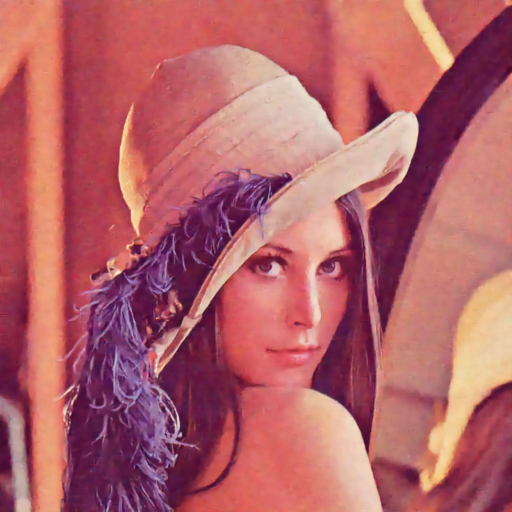

In [27]:
Image.fromarray(squeezed.astype('uint8'),'RGB')

In [28]:
output = Image.fromarray(squeezed.astype('uint8'),'RGB')

In [29]:
output.save('./Model3_test.png')

In [30]:
model3_test.predict(image_data)

array([[[[0.8582904 , 0.5042032 , 0.516752  ],
         [0.8621148 , 0.5086881 , 0.5364912 ],
         [0.85514575, 0.53053063, 0.5489639 ],
         ...,
         [0.8869761 , 0.5064941 , 0.43781543],
         [0.8170659 , 0.4642378 , 0.39611715],
         [0.7504165 , 0.45604658, 0.39751816]],

        [[0.88008976, 0.49099374, 0.5067338 ],
         [0.8823762 , 0.49672988, 0.50922257],
         [0.8773242 , 0.5107753 , 0.5114295 ],
         ...,
         [0.90824926, 0.5095632 , 0.44041428],
         [0.8860221 , 0.5000497 , 0.42146486],
         [0.8627181 , 0.4808938 , 0.42498308]],

        [[0.87841153, 0.49514705, 0.497296  ],
         [0.8733705 , 0.48975125, 0.48911077],
         [0.8708313 , 0.48990732, 0.47768933],
         ...,
         [0.9141688 , 0.53060454, 0.44756028],
         [0.89778817, 0.5147906 , 0.4180172 ],
         [0.88685274, 0.49532124, 0.4199391 ]],

        ...,

        [[0.37782013, 0.13448116, 0.22709048],
         [0.37050283, 0.13066247, 0.23101221]

In [31]:
image_data

array([[[[0.76862745, 0.34509804, 0.49019608],
         [0.89411765, 0.42352941, 0.74509804],
         [0.90588235, 0.61960784, 0.64705882],
         ...,
         [0.97647059, 0.47058824, 0.32941176],
         [0.74901961, 0.40784314, 0.22745098],
         [0.58039216, 0.45098039, 0.48627451]],

        [[0.89803922, 0.62745098, 0.45098039],
         [0.94509804, 0.37254902, 0.47058824],
         [1.        , 0.4627451 , 0.49019608],
         ...,
         [0.97647059, 0.61568627, 0.35686275],
         [0.99607843, 0.32941176, 0.4745098 ],
         [0.91372549, 0.37254902, 0.51372549]],

        [[0.91764706, 0.49803922, 0.50980392],
         [1.        , 0.4745098 , 0.51372549],
         [0.8745098 , 0.56470588, 0.60392157],
         ...,
         [0.95686275, 0.38431373, 0.42352941],
         [0.78039216, 0.4627451 , 0.41176471],
         [0.9254902 , 0.45882353, 0.43137255]],

        ...,

        [[0.32156863, 0.15294118, 0.2627451 ],
         [0.16078431, 0.29803922, 0.34509804]